# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 14 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import urllib

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
api_key = "ff64a0052c2e0d4619162bf7fa3c85f3"

url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + api_key


city_data = []

count = 1
set_count = 1



print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        count = 0
    city_url = url + "&q=" + urllib.request.pathname2url(city)
    print("Processing Record %s of Set %s | %s" % (count, set_count, city))
    print(city_url)
    count += 1
    
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
            # Parse out the max temp, humidity, and cloudiness
        latcity = city_weather["coord"]["lat"]
        lngcity = city_weather["coord"]["lon"]
        max_temp_city = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind_city= city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        city_data.append({"City": city, 
                          "Lat": latcity, 
                          "Lng": lngcity, 
                          "Max Temp": max_temp_city,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind_city,
                          "Country": city_country,
                          "Date": city_date})

 
    except:
        print("City not found. Skipping...")
        pass   
   
    
    
          
print("---------------------------------------")
print("Data Retrieval Complete")
print("---------------------------------------")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing Record 1 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=hermanus
Processing Record 2 of Set 1 | solnechnyy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=solnechnyy
Processing Record 3 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=new%20norfolk
Processing Record 4 of Set 1 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=kapaa
Processing Record 6 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c8

Processing Record 2 of Set 2 | usogorsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=usogorsk
Processing Record 3 of Set 2 | kitimat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=kitimat
Processing Record 4 of Set 2 | aksu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=aksu
Processing Record 5 of Set 2 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=severo-kurilsk
Processing Record 6 of Set 2 | verkhoturye
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=verkhoturye
Processing Record 7 of Set 2 | dikson
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=dikson
Processing Record 8 of Set 2 | abu kamal
http://api.openweathermap.org/data/2.5/weather?units=me

Processing Record 7 of Set 3 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=kaeo
Processing Record 8 of Set 3 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=la%20asuncion
Processing Record 9 of Set 3 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=batagay-alyta
Processing Record 10 of Set 3 | avarua
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=avarua
Processing Record 11 of Set 3 | campina verde
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=campina%20verde
Processing Record 12 of Set 3 | vardo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=vardo
Processing Record 13 of Set 3 | kirakira
http://api.openweathermap.org/data/2.5/weath

Processing Record 11 of Set 4 | cabedelo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=cabedelo
Processing Record 12 of Set 4 | eidfjord
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=eidfjord
Processing Record 13 of Set 4 | tadine
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=tadine
Processing Record 14 of Set 4 | karaul
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=karaul
City not found. Skipping...
Processing Record 15 of Set 4 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=san%20cristobal
Processing Record 16 of Set 4 | atambua
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=atambua
Processing Record 17 of Set 4 | yhu
http://api.openweathermap.or

Processing Record 17 of Set 5 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=port%20lincoln
Processing Record 18 of Set 5 | lishui
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=lishui
Processing Record 19 of Set 5 | encheng
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=encheng
Processing Record 20 of Set 5 | hukuntsi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=hukuntsi
Processing Record 21 of Set 5 | batemans bay
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=batemans%20bay
Processing Record 22 of Set 5 | seaford
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=seaford
Processing Record 23 of Set 5 | waitakere
http://api.openweathermap.org/data/2.5/w

Processing Record 22 of Set 6 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=fortuna
Processing Record 23 of Set 6 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=grand%20gaube
Processing Record 24 of Set 6 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=tiksi
Processing Record 25 of Set 6 | victoria
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=victoria
Processing Record 26 of Set 6 | coyaima
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=coyaima
Processing Record 27 of Set 6 | san pedro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=san%20pedro
Processing Record 28 of Set 6 | kuching
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 26 of Set 7 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=kavieng
Processing Record 27 of Set 7 | uvat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=uvat
Processing Record 28 of Set 7 | altoona
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=altoona
Processing Record 29 of Set 7 | rabat
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=rabat
Processing Record 30 of Set 7 | lolua
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=lolua
City not found. Skipping...
Processing Record 31 of Set 7 | gogrial
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=gogrial
City not found. Skipping...
Processing Record 32 of Set 7 | de aar
http://api.openweathermap

Processing Record 30 of Set 8 | pokhara
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=pokhara
Processing Record 31 of Set 8 | rawson
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=rawson
Processing Record 32 of Set 8 | berbera
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=berbera
City not found. Skipping...
Processing Record 33 of Set 8 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=barentsburg
City not found. Skipping...
Processing Record 34 of Set 8 | bolungarvik
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=bolungarvik
City not found. Skipping...
Processing Record 35 of Set 8 | abeche
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=abeche
Processing

Processing Record 33 of Set 9 | romny
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=romny
Processing Record 34 of Set 9 | port-cartier
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=port-cartier
Processing Record 35 of Set 9 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=puerto%20escondido
Processing Record 36 of Set 9 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=port%20hardy
Processing Record 37 of Set 9 | tazmalt
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=tazmalt
Processing Record 38 of Set 9 | berdigestyakh
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=berdigestyakh
Processing Record 39 of Set 9 | pathein
http://api.openweath

Processing Record 37 of Set 10 | sun city west
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=sun%20city%20west
Processing Record 38 of Set 10 | uddevalla
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=uddevalla
Processing Record 39 of Set 10 | alotau
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=alotau
City not found. Skipping...
Processing Record 40 of Set 10 | cururupu
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=cururupu
Processing Record 41 of Set 10 | huntingdon
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=huntingdon
Processing Record 42 of Set 10 | concepcion del oro
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=concepcion%20del%20oro
Processing Record 43

Processing Record 41 of Set 11 | jining
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=jining
Processing Record 42 of Set 11 | encs
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=encs
Processing Record 43 of Set 11 | college
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=college
Processing Record 44 of Set 11 | teabo
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=teabo
Processing Record 45 of Set 11 | mandalgovi
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=mandalgovi
Processing Record 46 of Set 11 | thio
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=thio
Processing Record 47 of Set 11 | ixtapa
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0

Processing Record 46 of Set 12 | semey
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=semey
Processing Record 47 of Set 12 | bosaso
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=bosaso
Processing Record 48 of Set 12 | teluknaga
http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=ff64a0052c2e0d4619162bf7fa3c85f3&q=teluknaga
---------------------------------------
Data Retrieval Complete
---------------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Export the City_Data into a csv

new_city_data = pd.DataFrame(city_data)
new_city_data.to_csv = ("output_data/cities.csv")


# Show Record Count
new_city_data.count()



City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [38]:
# Display DataFrame

new_city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,56,ZA,1538523451,86,-34.42,19.24,10.08,2.77
1,solnechnyy,0,RU,1538523451,84,50.72,136.64,9.33,1.67
2,new norfolk,75,AU,1538521200,87,-42.78,147.06,12.00,3.60
3,kapaa,40,US,1538520960,72,22.08,-159.32,30.60,4.10
4,tuktoyaktuk,75,CA,1538521740,92,69.44,-133.03,-3.00,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.



#### Latitude vs. Temperature Plot

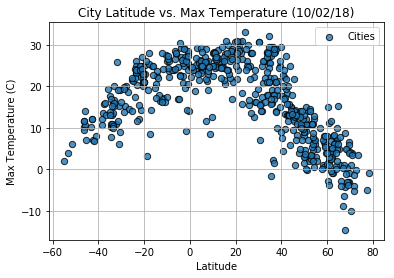

In [47]:
#plt.scatter(city_max_temp, city_lat,s=15, marker="o", linewidth=1.0, facecolors="coral", edgecolors="black")

new_city_data.plot.scatter(x='Lat',y='Max Temp', label='Cities',s=40, marker="o", linewidth=1.0, alpha=0.8, facecolors="coral", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (10/02/18)')
plt.grid()
plt.savefig("../images/scatter1.png", bbox_inches = 'tight')

plt.draw()
plt.show()


#### Latitude vs. Humidity Plot

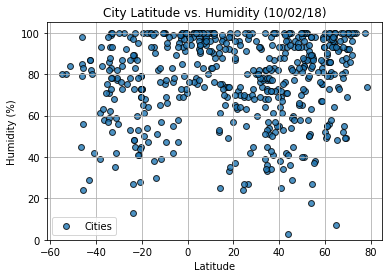

In [45]:
new_city_data.plot.scatter(x= 'Lat', y='Humidity', label='Cities',s=35, marker="o", linewidth=1.0, alpha=0.8, facecolors="coral", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/02/18)')
plt.grid()
plt.savefig("../images/scatter5.png", bbox_inches = 'tight')
plt.ylim([0,105])
plt.show()

#### Latitude vs. Cloudiness Plot

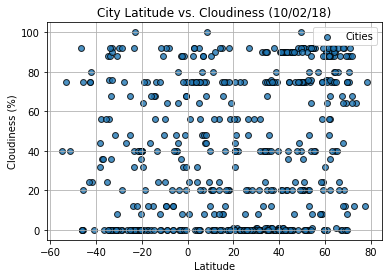

In [41]:
new_city_data.plot.scatter(x='Lat',y='Cloudiness', label='Cities',s=35, marker="o", linewidth=1.0, alpha=0.8, facecolors="coral", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/02/18)')
plt.grid()
plt.savefig("../images/scatter3.png", bbox_inches = 'tight')
plt.draw()
plt.show()

#### Latitude vs. Wind Speed Plot

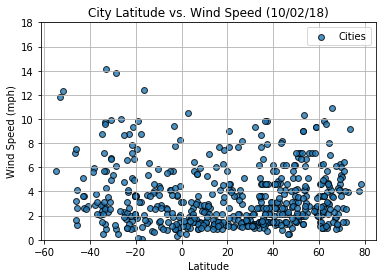

In [42]:
new_city_data.plot.scatter(x='Lat',y='Wind Speed', label='Cities',s=35, marker="o", linewidth=1.0, alpha=0.8, facecolors="coral", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/02/18)')
plt.grid()
plt.savefig("../images/scatter4.png", bbox_inches = 'tight')
plt.ylim([0,18])
plt.draw()
plt.show()